<a href="https://colab.research.google.com/github/Zabiullahkhan/Data_Science/blob/main/DL_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import tensorflow as tf
print(tf.__version__)

2.8.2


##### Import Some basic Libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

In [38]:
dataset = pd.read_csv("/content/Churn_Modelling.csv")

In [39]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Divide the dataset into Dependent and Independent Features

In [40]:
x = dataset.iloc[:,3:13]
y =dataset.iloc[:,13]

In [41]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [42]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

### Feature Engineering

In [43]:
geography = pd.get_dummies(x["Geography"], drop_first = True)
gender = pd.get_dummies(x["Gender"], drop_first = True)

###### Concatenate These Variables with Data Frame

In [44]:
x = x.drop(["Geography","Gender"], axis = 1)

In [45]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [46]:
x = pd.concat([x,geography,gender], axis = 1)

In [47]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


###### Splitting The Dataset Into Train set, Test set

In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 0)

###### Feature Scaling

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [50]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [51]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [52]:
x_train.shape

(8000, 11)

###### Lets Create The ANN

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [54]:
 ### Lets Initialize the ANN
 classifier = Sequential()

In [55]:
## Adding The Layers
classifier.add(Dense(units =11, activation = "relu"))
# classifier.add(Dropout(0.2))                        ## We Can Add Dropout Layers also in each layer

In [56]:
# Adding The first Hidden layer
classifier.add(Dense(units = 7, activation = "relu"))

In [57]:
# Adding The second Hidden layer
classifier.add(Dense(units = 6, activation = "relu"))

In [58]:
# Adding The Output Layer
classifier.add(Dense(units = 1, activation = "sigmoid"))

In [59]:
classifier.compile(optimizer = "adam",loss = "binary_crossentropy", metrics = ['accuracy'])
#by default Adam uses a Lerning rate of 0.01
#if we want to change the learning rate we can change 

In [60]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [61]:
classifier.compile(optimizer = opt,loss = "binary_crossentropy", metrics = ['accuracy'])

In [62]:
#### Early Stopping
import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [63]:
model_history = classifier.fit(x_train, y_train, validation_split = 0.33, batch_size = 10, epochs = 1000, callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 4ms/step - loss: 0.4343 - accuracy: 0.8190 - val_loss: 0.4073 - val_accuracy: 0.8277
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3800 - accuracy: 0.8429 - val_loss: 0.3759 - val_accuracy: 0.8444
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3609 - accuracy: 0.8509 - val_loss: 0.3791 - val_accuracy: 0.8444
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3537 - accuracy: 0.8561 - val_loss: 0.3714 - val_accuracy: 0.8501
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3523 - accuracy: 0.8578 - val_loss: 0.3751 - val_accuracy: 0.8421
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3553 - accuracy: 0.8543 - val_loss: 0.3667 - val_accuracy: 0.8519
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3448 - accuracy: 0.8567 - val_loss: 0.3682 - val_accuracy:

In [64]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

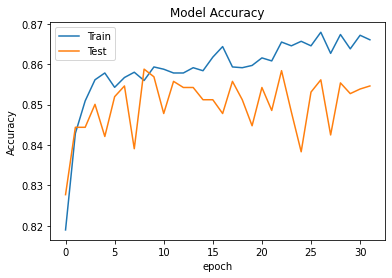

In [65]:
# Summarize History for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.legend(['Train','Test'], loc = 'upper left')
plt.show()

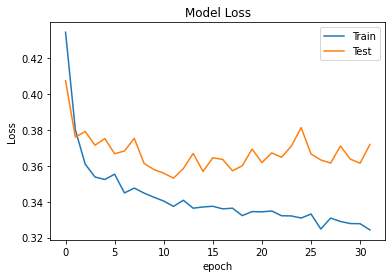

In [66]:
# Summarize for Loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("epoch")
plt.legend(['Train','Test'],loc='upper right')
plt.show()

In [67]:
# Making The Prediction And Evaluating The Model
# Predicting The Test Set Result
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

In [68]:
## Make The Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [69]:
cm

array([[1518,   77],
       [ 198,  207]])

In [70]:
# Calculate The Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score 

0.8625

In [71]:
# Get The Weights
classifier.get_weights()

[array([[-0.74450266, -0.31824866,  0.19753446,  1.0129786 , -0.15989251,
          0.16283536, -0.5285824 ,  0.6169192 , -0.23929453, -0.20847423,
         -0.04664161],
        [-2.3627667 ,  1.1886292 , -1.556342  , -1.6530707 ,  1.045042  ,
         -1.1184484 ,  3.0456927 , -1.8547937 ,  2.4403937 , -0.9134446 ,
          1.0157069 ],
        [-0.0088557 ,  0.16355625,  0.88368267,  0.8078008 ,  0.6964865 ,
          0.18017864, -1.1327603 ,  0.07664876, -0.07302312, -0.39061117,
          0.20816173],
        [-0.34058574, -2.8108432 , -2.4163911 ,  2.2160225 , -1.4949026 ,
         -0.39177316, -0.04400153, -0.6704973 ,  0.19249184, -0.2810759 ,
          0.77993155],
        [ 0.48729867, -3.4710145 , -0.77382743, -0.85996807, -0.8293993 ,
          2.581987  , -1.149576  , -1.7747382 ,  2.5184262 , -0.52125657,
          2.8374317 ],
        [-0.5865181 , -0.10045605, -0.32999447, -0.39773607,  0.2116425 ,
          0.47572693, -0.3283796 ,  2.1377275 , -0.34326273, -0.6758109